In [28]:
import numpy as np
import matplotlib.pyplot as plt

AND Function - Manually assigned weights:
Initial Predictions: [1 0 1 1]
Number of Errors: 2


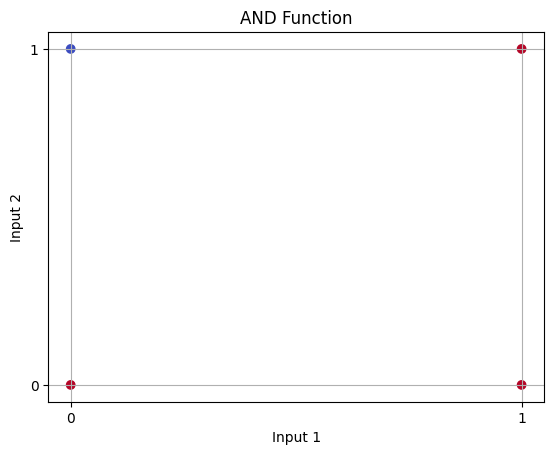


OR Function - Manually assigned weights:
Initial Predictions: [1 1 1 1]
Number of Errors: 1


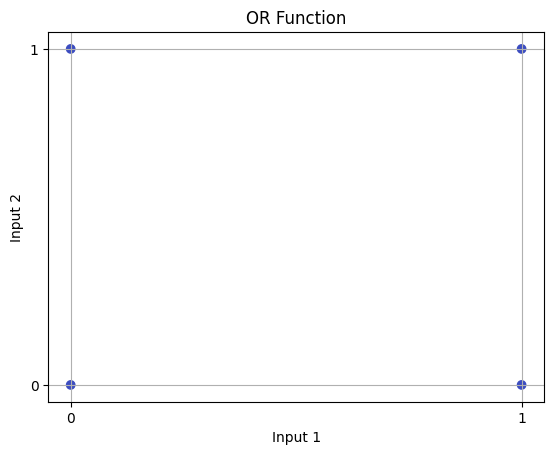


NAND Function - Manually assigned weights:
Initial Predictions: [0 1 0 0]
Number of Errors: 2


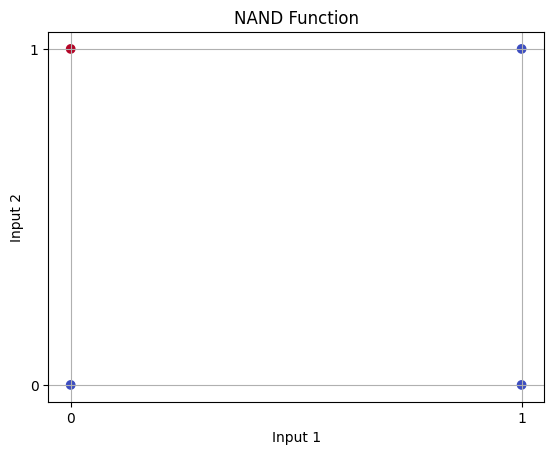


XOR function cannot be represented by a single-layer perceptron.


In [41]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, inp, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(inp + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y):
        for _ in range(self.epochs):
            for x, target in zip(X, y):
                prediction = self.predict(x)
                self.weights[1:] += self.learning_rate * (target - prediction) * x
                self.weights[0] += self.learning_rate * (target - prediction)

    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.step(summation)

def plot_predictions(X, predictions, title):
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

def main():
    # AND function
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    perceptron_and = Perceptron(2)
    manual_weights_and = np.array([0.5, 0.5, -0.7])  # Manually assigned weights
    perceptron_and.weights = manual_weights_and
    predictions_and = np.array([perceptron_and.predict(x) for x in X_and])
    print("AND Function - Manually assigned weights:")
    print("Initial Predictions:", predictions_and)
    errors_and = np.sum(np.abs(y_and - predictions_and))
    print("Number of Errors:", errors_and)
    plot_predictions(X_and, predictions_and, 'AND Function')

    # OR function
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    perceptron_or = Perceptron(2)
    manual_weights_or = np.array([0.5, 0.5, -0.2])  # Manually assigned weights
    perceptron_or.weights = manual_weights_or
    predictions_or = np.array([perceptron_or.predict(x) for x in X_or])
    print("\nOR Function - Manually assigned weights:")
    print("Initial Predictions:", predictions_or)
    errors_or = np.sum(np.abs(y_or - predictions_or))
    print("Number of Errors:", errors_or)
    plot_predictions(X_or, predictions_or, 'OR Function')

    # NAND function
    X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_nand = np.array([1, 1, 1, 0])
    perceptron_nand = Perceptron(2)
    manual_weights_nand = np.array([-0.5, -0.5, 0.7])  # Manually assigned weights
    perceptron_nand.weights = manual_weights_nand
    predictions_nand = np.array([perceptron_nand.predict(x) for x in X_nand])
    print("\nNAND Function - Manually assigned weights:")
    print("Initial Predictions:", predictions_nand)
    errors_nand = np.sum(np.abs(y_nand - predictions_nand))
    print("Number of Errors:", errors_nand)
    plot_predictions(X_nand, predictions_nand, 'NAND Function')

    # XOR function (requires multi-layer perceptron or more complex networks)
    print("\nXOR function cannot be represented by a single-layer perceptron.")

if __name__ == "__main__":
    main()


In [42]:
import numpy as np

class Perceptron:
    def __init__(self, inp, weights=None, learning_rate=0.01, epochs=100):
        if weights is None:
            self.weights = np.zeros(inp + 1)
        else:
            self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y):
        errors = 0
        for _ in range(self.epochs):
            errors = 0
            for x, target in zip(X, y):
                prediction = self.predict(x)
                self.weights[1:] += self.learning_rate * (target - prediction) * x
                self.weights[0] += self.learning_rate * (target - prediction)
                errors += int(target != prediction)
            if errors == 0:
                break
        return errors

    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.step(summation)

def calculate_accuracy(predictions, errors):
    total_samples = len(predictions)
    correct_predictions = total_samples - errors
    accuracy = correct_predictions / total_samples
    return accuracy

def main():
    # Manually assigned weights for AND function
    weights_and = np.array([-0.5, 0.5, 0.5])
    # AND function
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    perceptron_and = Perceptron(2, weights=weights_and)
    errors_and = perceptron_and.fit(X_and, y_and)
    initial_predictions_and = [perceptron_and.predict(x) for x in X_and]
    accuracy_and = calculate_accuracy(initial_predictions_and, errors_and)
    print("AND Function - Manually assigned weights:")
    print("Initial Predictions:", initial_predictions_and)
    print("Number of Errors:", errors_and)
    print("Accuracy:", accuracy_and)

    # Manually assigned weights for OR function
    weights_or = np.array([-0.5, 1, 1])
    # OR function
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    perceptron_or = Perceptron(2, weights=weights_or)
    errors_or = perceptron_or.fit(X_or, y_or)
    initial_predictions_or = [perceptron_or.predict(x) for x in X_or]
    accuracy_or = calculate_accuracy(initial_predictions_or, errors_or)
    print("\nOR Function - Manually assigned weights:")
    print("Initial Predictions:", initial_predictions_or)
    print("Number of Errors:", errors_or)
    print("Accuracy:", accuracy_or)

    # Manually assigned weights for NAND function
    weights_nand = np.array([0.5, -1, -1])
    # NAND function
    X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_nand = np.array([1, 1, 1, 0])
    perceptron_nand = Perceptron(2, weights=weights_nand)
    errors_nand = perceptron_nand.fit(X_nand, y_nand)
    initial_predictions_nand = [perceptron_nand.predict(x) for x in X_nand]
    accuracy_nand = calculate_accuracy(initial_predictions_nand, errors_nand)
    print("\nNAND Function - Manually assigned weights:")
    print("Initial Predictions:", initial_predictions_nand)
    print("Number of Errors:", errors_nand)
    print("Accuracy:", accuracy_nand)

    # XOR function (requires multi-layer perceptron or more complex networks)
    print("\nXOR function cannot be represented by a single-layer perceptron.")

if __name__ == "__main__":
    main()


AND Function - Manually assigned weights:
Initial Predictions: [0, 0, 0, 1]
Number of Errors: 0
Accuracy: 1.0

OR Function - Manually assigned weights:
Initial Predictions: [0, 1, 1, 1]
Number of Errors: 0
Accuracy: 1.0

NAND Function - Manually assigned weights:
Initial Predictions: [1, 1, 1, 0]
Number of Errors: 0
Accuracy: 1.0

XOR function cannot be represented by a single-layer perceptron.


another code of perceptron after weights being changed and accuracy achieved as 1.0